# The TED World

Founded in 1984 as a nonprofit initiative, the TED Conference began as a platform to connect visionaries from Technology, Entertainment, and Design. Over time, it has evolved into a global phenomenon, embracing diverse disciplines and becoming a catalyst for transformative ideas. By 2015, TED and its independently organized TEDx events had shared over 2,000 talks, featuring trailblazers in science, business, innovation, and social change.  

With the motto "Ideas worth spreading," TED has revolutionized the way knowledge is shared, offering a stage where experts distill years of research and experience into captivating 18-minute presentations. What makes it even more extraordinary is that these powerful insights are freely available to a global audience online.  

Since I first encountered TED Talks, they have been a constant source of inspiration. Their compelling storytelling, thought-provoking visuals, and insightful perspectives have expanded my horizons, fueling my curiosity about the impact of ideas and the people behind them.

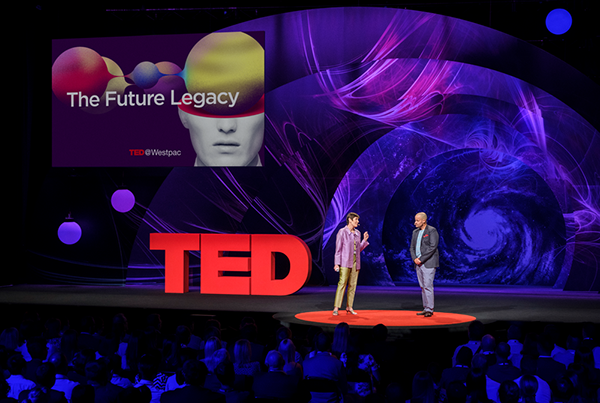

# Import Libraries

Here are the essential libraries for data analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Import Dataset

Import the dataset file in below section.

In [ ]:
from google.colab import files
upload = files.upload()
filename = list(upload.keys())[0]
data = pd.read_csv(filename)

Saving data.csv to data.csv


# Feature Avilable

These lines will help you gather necessary information about the dataset after importing it, allowing you to understand its structure, summary statistics, missing values, and provide a quick view of the data.









In [ ]:
data.head(15)

title  \
0       Climate action needs new frontline leadership   
1         The dark history of the overthrow of Hawaii   
2      How play can spark new ideas for your business   
3   Why is China appointing judges to combat clima...   
4      Cement's carbon problem — and 2 ways to fix it   
5   The tragedy of air pollution — and an urgent d...   
6                      The myth of Narcissus and Echo   
7          You deserve the right to repair your stuff   
8   What nature can teach us about sustainable bus...   
9      The origins of blackface and Black stereotypes   
10  A sex therapist's secret to rediscovering your...   
11  How do jetpacks work? And why don't we all hav...   
12  What regret can teach you about living a good ...   
13         How to fix the "bugs" in the net-zero code   
14            "Big Yellow Taxi" / "Song for Sunshine"   

                        author            date   views  likes  \
0         Ozawa Bineshi Albert   December 2021  404000  12000   
1                Sydney Iaukea   February 2022  214000   6400   
2                Martin Reeves  September 2021  412000  12000   
3            James K. Thornton    October 2021  427000  12000   
4              Mahendra Singhi    October 2021    2400     72   
5   Rosamund Adoo-Kissi-Debrah    October 2021  422000  12000   
6             Iseult Gillespie   February 2022  412000  12000   
7             Gay Gordon-Byrne     August 2021  455000  13000   
8                  Erin Meezan   February 2022   66000   1900   
9                   Dwan Reece      March 2019  584000  17000   
10                  Ian Kerner     August 2021   87000   2600   
11            Richard Browning   February 2022  213000   6400   
12              Daniel H. Pink    January 2022  622000  18000   
13                 Lucas Joppa    October 2021  526000  15000   
14         Belle and Sebastian    October 2021   23000    690   

                                                 link  
0   https://ted.com/talks/ozawa_bineshi_albert_cli...  
1   https://ted.com/talks/sydney_iaukea_the_dark_h...  
2   https://ted.com/talks/martin_reeves_how_play_c...  
3   https://ted.com/talks/james_k_thornton_why_is_...  
4   https://ted.com/talks/mahendra_singhi_cement_s...  
5   https://ted.com/talks/rosamund_adoo_kissi_debr...  
6   https://ted.com/talks/iseult_gillespie_the_myt...  
7   https://ted.com/talks/gay_gordon_byrne_you_des...  
8   https://ted.com/talks/erin_meezan_what_nature_...  
9   https://ted.com/talks/dwan_reece_the_origins_o...  
10  https://ted.com/talks/ian_kerner_a_sex_therapi...  
11  https://ted.com/talks/richard_browning_how_do_...  
12  https://ted.com/talks/daniel_h_pink_what_regre...  
13  https://ted.com/talks/lucas_joppa_how_to_fix_t...  
14  https://ted.com/talks/belle_and_sebastian_big_...

In [ ]:
data.shape

(5440, 6)

In [ ]:
data.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

# Most Viewed and Liked Talks of All Time

At first, we aim to identify the most viewed and liked TED Talk of all time. This will provide an overview of TED's impact, showcasing the talk that has resonated the most with audiences globally. By examining this, we can gain insight into the topics and ideas that have captured widespread attention and sparked meaningful discussions.

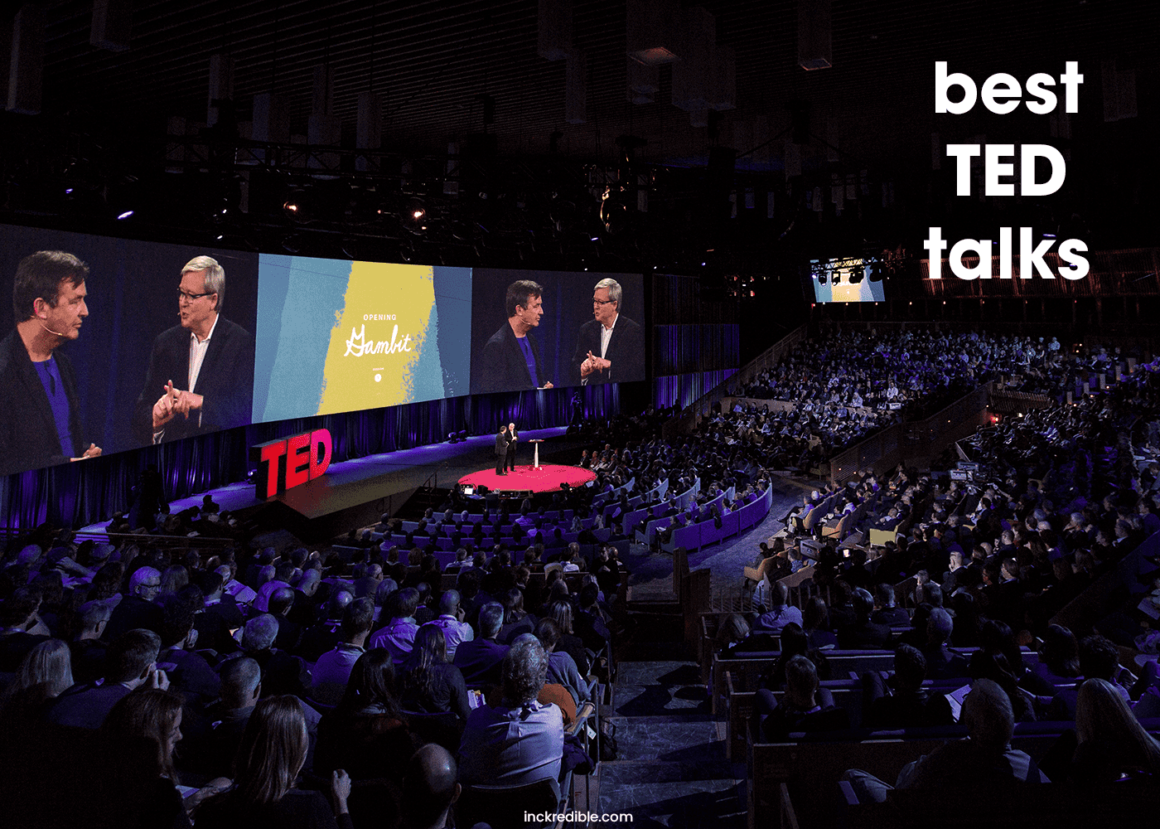

In [ ]:
popular_talks_views = data[['title', 'author', 'views', 'date']].sort_values('views', ascending=False)[:15]
popular_talks_views

title            author  \
5436                        Do schools kill creativity?  Sir Ken Robinson   
4084           Your body language may shape who you are         Amy Cuddy   
2958         Inside the mind of a master procrastinator         Tim Urban   
4765                   How great leaders inspire action       Simon Sinek   
4605                         The power of vulnerability       Brené Brown   
3504         How to speak so that people want to listen   Julian Treasure   
3251                 The next outbreak? We're not ready        Bill Gates   
2168                     My philosophy for a happy life         Sam Berns   
3017  What makes a good life? Lessons from the longe...  Robert Waldinger   
3994  Looks aren't everything. Believe me, I'm a model.   Cameron Russell   
4990             10 things you didn't know about orgasm        Mary Roach   
2166                 Why people believe they can't draw       Graham Shaw   
3799                          The orchestra in my mouth          Tom Thum   
3758                            The art of misdirection    Apollo Robbins   
4407                                 How to spot a liar      Pamela Meyer   

         views            date  
5436  72000000   February 2006  
4084  64000000       June 2012  
2958  60000000   February 2016  
4765  57000000  September 2009  
4605  56000000       June 2010  
3504  49000000       June 2013  
3251  43000000      March 2015  
2168  43000000    October 2013  
3017  41000000   November 2015  
3994  38000000    October 2012  
4990  37000000   February 2009  
2166  37000000   February 2015  
3799  34000000        May 2013  
3758  31000000       June 2013  
4407  31000000       July 2011

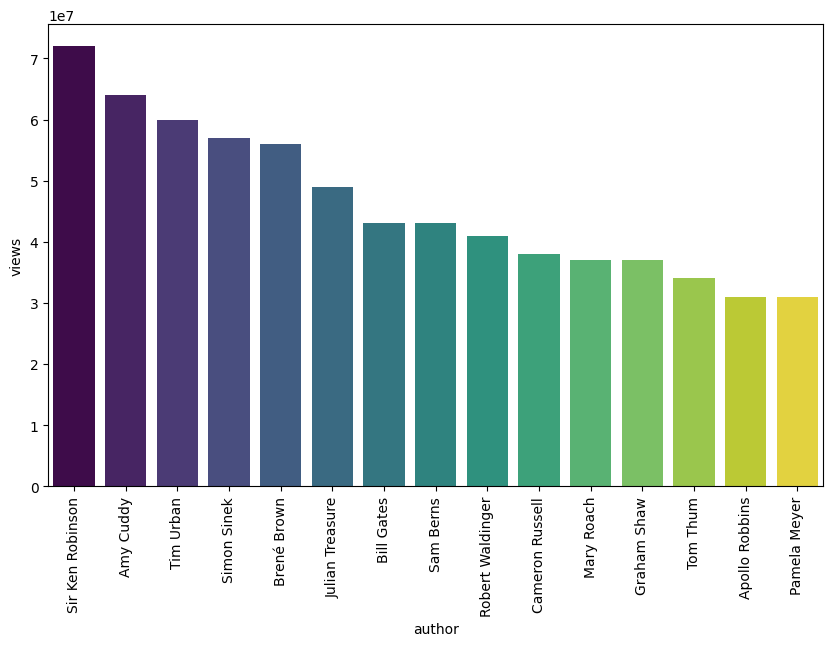

In [ ]:
num_bars = len(popular_talks_views['author'])
colormap = cm.get_cmap('viridis', num_bars)
colors = [colormap(i) for i in range(num_bars)]

plt.figure(figsize=(10,6))
sns.barplot(x='author', y='views', data=popular_talks_views, palette = colors)
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='abbr', ylabel='views'>

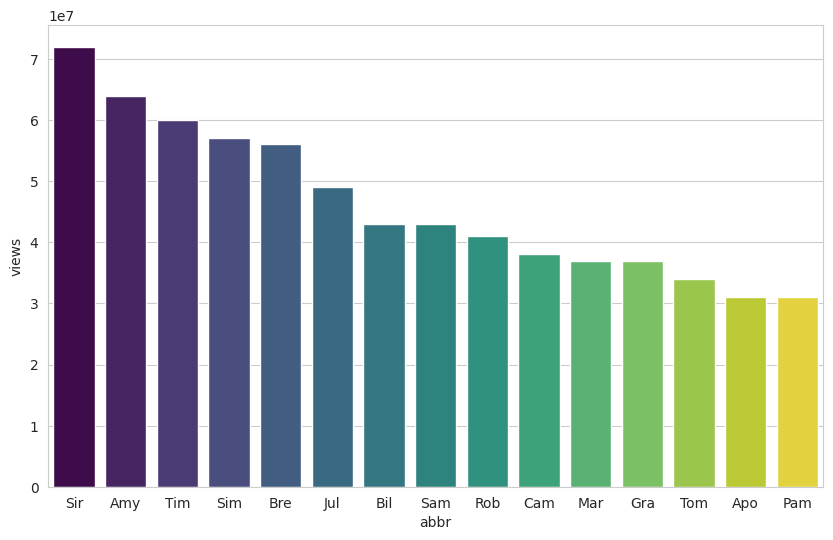

In [ ]:
num_bars = len(popular_talks_views['author'])
colormap = cm.get_cmap('viridis', num_bars)
colors = [colormap(i) for i in range(num_bars)]

popular_talks_views['abbr'] = popular_talks_views['author'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=popular_talks_views, palette = colors)

<Axes: xlabel='views', ylabel='Density'>

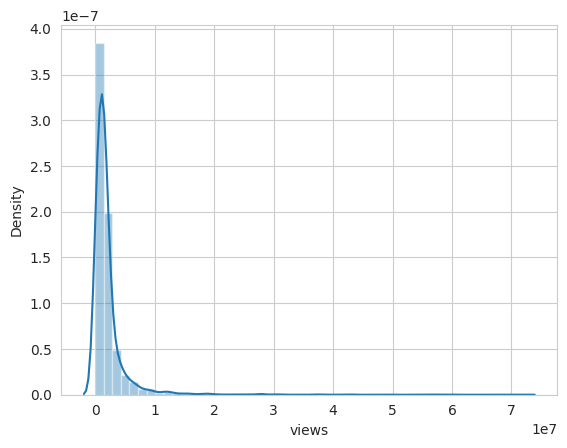

In [ ]:
sns.distplot(data['views'])

<Axes: xlabel='views', ylabel='Density'>

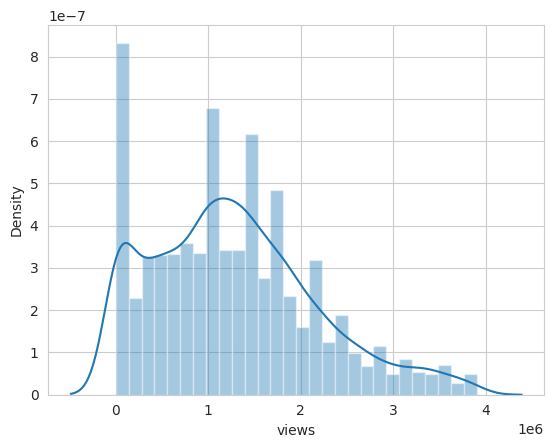

In [ ]:
sns.distplot(data[data['views'] < 0.4e7]['views'])

In [ ]:
data['views'].describe()

count    5.440000e+03
mean     2.061576e+06
std      3.567098e+06
min      5.320000e+02
25%      6.707500e+05
50%      1.300000e+06
75%      2.100000e+06
max      7.200000e+07
Name: views, dtype: float64

In [ ]:
popular_talks_likes = data[['title', 'author', 'likes', 'views', 'date']].sort_values('likes', ascending=False)[:15]
popular_talks_likes

title            author  \
5436                        Do schools kill creativity?  Sir Ken Robinson   
4084           Your body language may shape who you are         Amy Cuddy   
2958         Inside the mind of a master procrastinator         Tim Urban   
4605                         The power of vulnerability       Brené Brown   
4765                   How great leaders inspire action       Simon Sinek   
3504         How to speak so that people want to listen   Julian Treasure   
3251                 The next outbreak? We're not ready        Bill Gates   
2168                     My philosophy for a happy life         Sam Berns   
3017  What makes a good life? Lessons from the longe...  Robert Waldinger   
2166                 Why people believe they can't draw       Graham Shaw   
4990             10 things you didn't know about orgasm        Mary Roach   
3994  Looks aren't everything. Believe me, I'm a model.   Cameron Russell   
3799                          The orchestra in my mouth          Tom Thum   
4407                                 How to spot a liar      Pamela Meyer   
3758                            The art of misdirection    Apollo Robbins   

        likes     views            date  
5436  2100000  72000000   February 2006  
4084  1900000  64000000       June 2012  
2958  1800000  60000000   February 2016  
4605  1700000  56000000       June 2010  
4765  1700000  57000000  September 2009  
3504  1400000  49000000       June 2013  
3251  1300000  43000000      March 2015  
2168  1300000  43000000    October 2013  
3017  1200000  41000000   November 2015  
2166  1100000  37000000   February 2015  
4990  1100000  37000000   February 2009  
3994  1100000  38000000    October 2012  
3799  1000000  34000000        May 2013  
4407   953000  31000000       July 2011  
3758   933000  31000000       June 2013

<Axes: xlabel='abbr', ylabel='likes'>

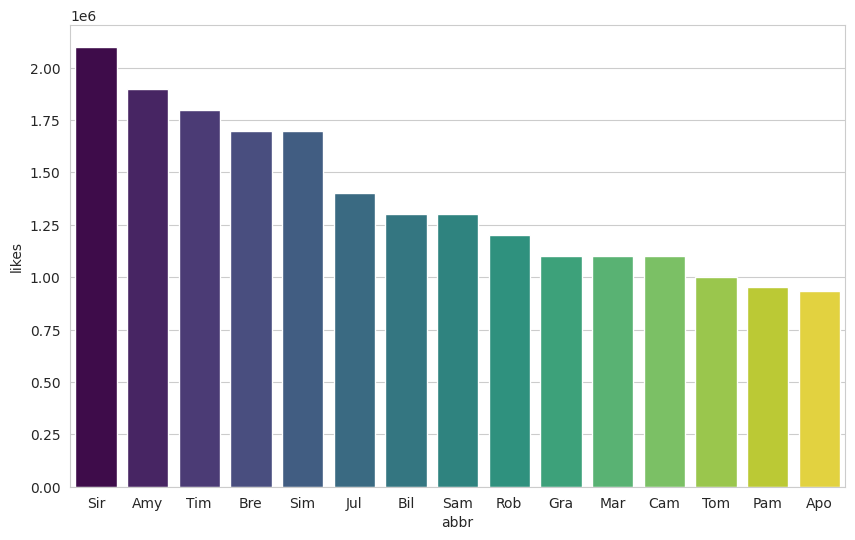

In [ ]:
num_bars = len(popular_talks_likes['author'])
colormap = cm.get_cmap('viridis', num_bars)
colors = [colormap(i) for i in range(num_bars)]

popular_talks_likes['abbr'] = popular_talks_likes['author'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='likes', data=popular_talks_likes, palette = colors)

# Analysing TED Talks by Month and Year

TED (especially TEDx) Talks occur year-round, but is there a specific month when they peak in popularity or frequency? In other words, how are the talks distributed across different months since TED's inception? Let’s explore this by analyzing the data to determine any trends or patterns.

Similarly, we can also examine the distribution of TED Talks over the years. By analyzing this, we can identify how the frequency and reach of TED Talks have evolved, helping us understand whether TED’s influence has grown over time or if certain years saw significant milestones.

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()

In [ ]:
talks_by_month = data.groupby('month')['title'].count().reset_index()
talks_by_month.rename(columns={'title': 'talk_count'}, inplace=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
talks_by_month['month'] = pd.Categorical(talks_by_month['month'], categories=month_order, ordered=True)
talks_by_month.sort_values('month', inplace=True)

In [ ]:
talks_by_year = data.groupby('year')['title'].count().reset_index()
talks_by_year.rename(columns={'title': 'talk_count'}, inplace=True)

In [ ]:
num_bars = len(popular_talks_likes['author'])
colormap = cm.get_cmap('viridis', num_bars)
colors = [colormap(i) for i in range(num_bars)]

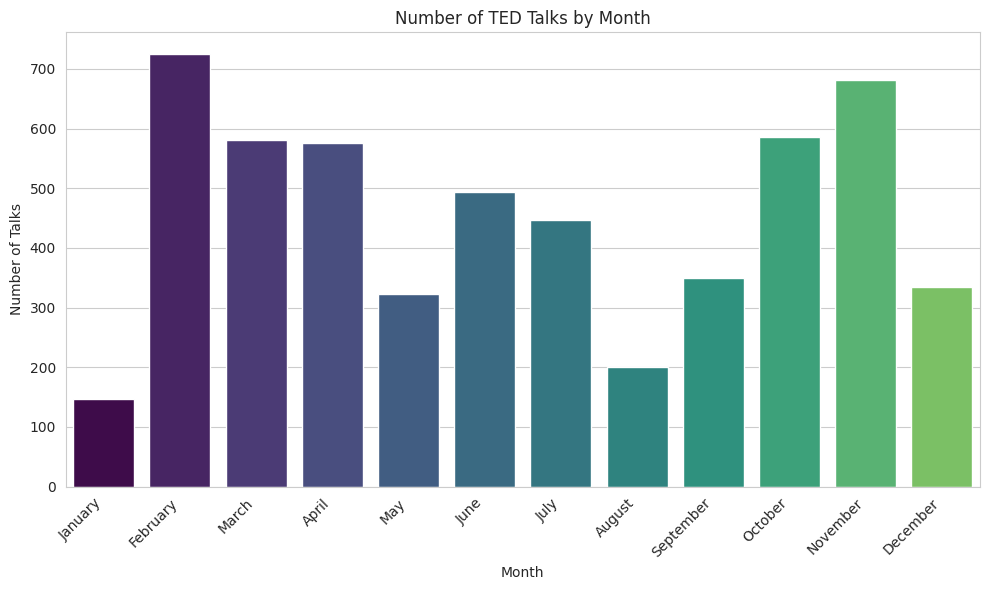

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='talk_count', data=talks_by_month, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Number of TED Talks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Talks')
plt.tight_layout()
plt.show()

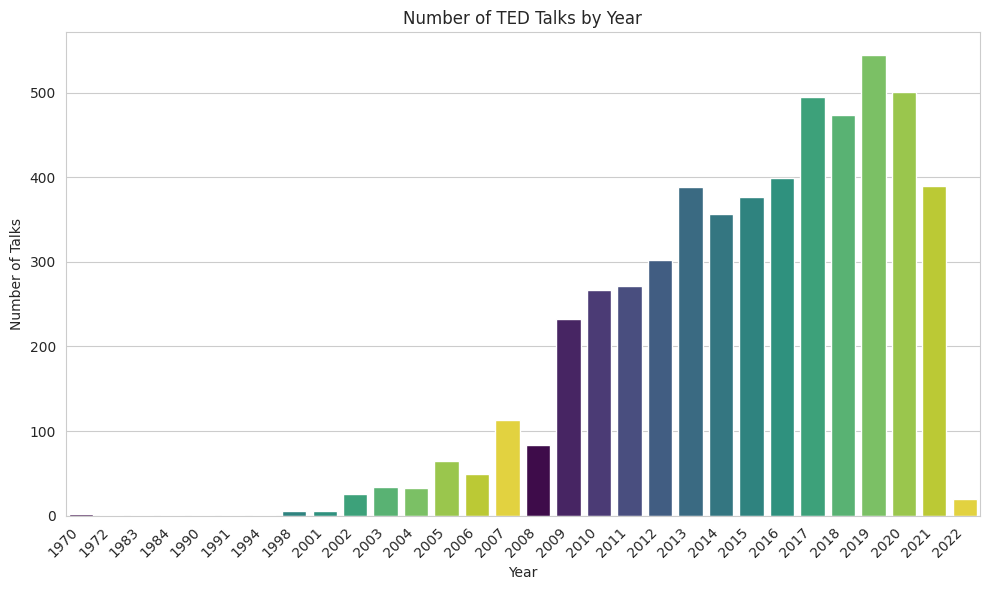

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='talk_count', data=talks_by_year, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Number of TED Talks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Talks')
plt.tight_layout()
plt.show()

<Axes: xlabel='year', ylabel='talk_count'>

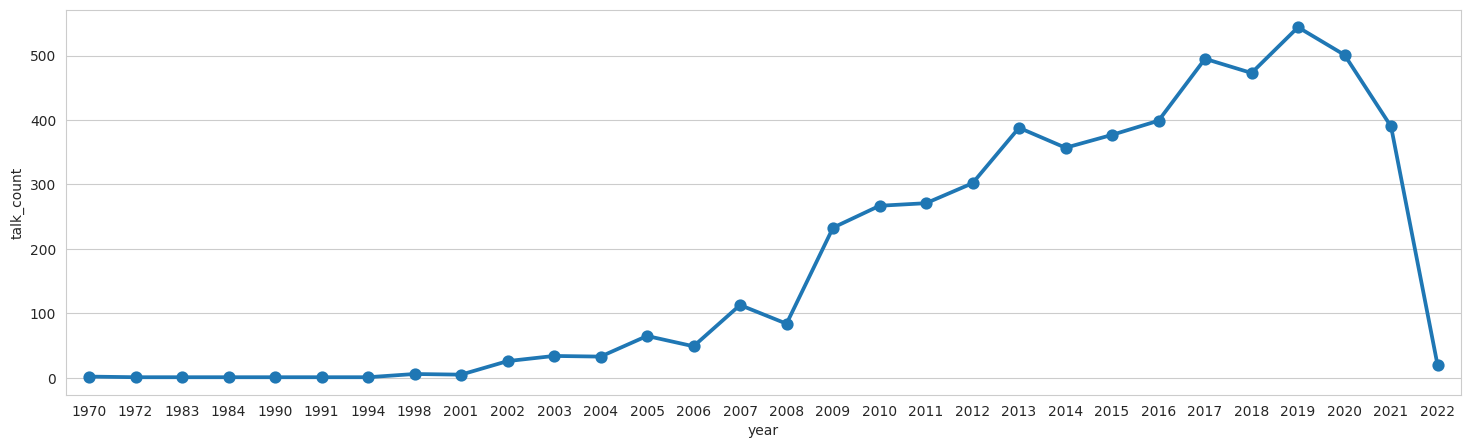

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talk_count', data= talks_by_year)

In [ ]:
heatmap_data = data.pivot_table(index='month', columns='year', values='title', aggfunc='count')
heatmap_data.rename(columns={'title': 'talk_count'}, inplace=True)

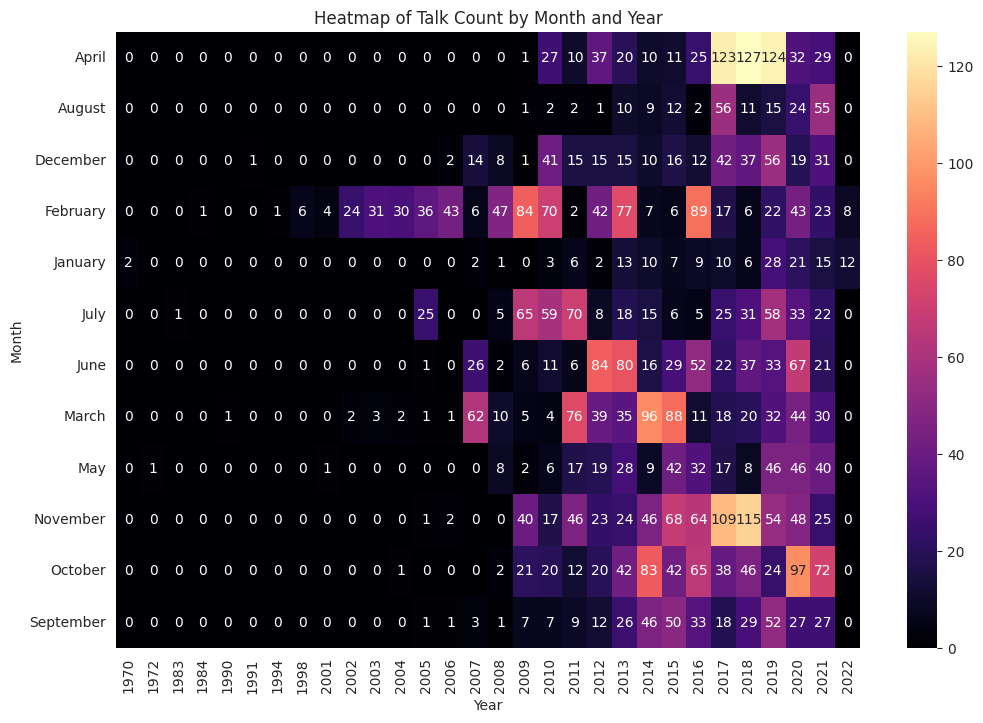

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.fillna(0), cmap='magma', annot=True, fmt= '.0f')
plt.title('Heatmap of Talk Count by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# TED Authors

In this section, we will try and gain insight about all the amazing speakers who have managed to inspire millions of people through their talks on the TED Platform. The first question we shall ask in this section is who are the most popular TED Speakers. That is, which speakers have given the most number of TED Talks.

In [ ]:
author_counts = data['author'].value_counts()
author_counts_data = author_counts.reset_index()
author_counts_data.columns = ['author', 'author_counts']
print(author_counts_data)

                          author  author_counts
0                   Alex Gendler             45
1               Iseult Gillespie             33
2                    Matt Walker             18
3                 Alex Rosenthal             15
4                  Elizabeth Cox             13
...                          ...            ...
4438              Peter Donnelly              1
4439                  Dwan Reece              1
4440                 Erin Meezan              1
4441            Gay Gordon-Byrne              1
4442  Rosamund Adoo-Kissi-Debrah              1

[4443 rows x 2 columns]


In [ ]:
author_counts = data['author'].value_counts()
author_counts_data = author_counts.reset_index()
author_counts_data.columns = ['author', 'author_counts']
print(author_counts_data.head(10))

             author  author_counts
0      Alex Gendler             45
1  Iseult Gillespie             33
2       Matt Walker             18
3    Alex Rosenthal             15
4     Elizabeth Cox             13
5        Emma Bryce             12
6     Juan Enriquez             11
7     Daniel Finkel             11
8      Mona Chalabi              9
9        Jen Gunter              9


In [ ]:
data = data[['author', 'title']]
data.dropna(inplace = True)
data.head(10)

author  \
0        Ozawa Bineshi Albert   
1               Sydney Iaukea   
2               Martin Reeves   
3           James K. Thornton   
4             Mahendra Singhi   
5  Rosamund Adoo-Kissi-Debrah   
6            Iseult Gillespie   
7            Gay Gordon-Byrne   
8                 Erin Meezan   
9                  Dwan Reece   

                                               title  
0      Climate action needs new frontline leadership  
1        The dark history of the overthrow of Hawaii  
2     How play can spark new ideas for your business  
3  Why is China appointing judges to combat clima...  
4     Cement's carbon problem — and 2 ways to fix it  
5  The tragedy of air pollution — and an urgent d...  
6                     The myth of Narcissus and Echo  
7         You deserve the right to repair your stuff  
8  What nature can teach us about sustainable bus...  
9     The origins of blackface and Black stereotypes

In [ ]:
new_data = data.copy()

# Text Preprocessing

Raw textual data often requires extensive preprocessing before it can be utilized for building any machine learning model. Key steps in this process include removing stopwords, applying stemming and lemmatization, and eliminating punctuation. These techniques are crucial for transforming unrefined text into a structured format that is ready for analysis or model development. By cleaning and standardizing the text, we can ensure that the model focuses on meaningful patterns and reduces noise from irrelevant words and characters.

In [ ]:
def remove_stopwords(text):
  stop_words = stopwords.words('english')

  imp_words = []

  for word in str(text).split():
    word = word.lower()

    if word not in stop_words:
      imp_words.append(word)

  output = " ".join(imp_words)

  return output


In [ ]:
data['title'] = data['title'].apply(lambda text:
remove_stopwords(text))
data.head()

author                                           title
0  Ozawa Bineshi Albert   climate action needs new frontline leadership
1         Sydney Iaukea                   dark history overthrow hawaii
2         Martin Reeves                   play spark new ideas business
3     James K. Thornton  china appointing judges combat climate change?
4       Mahendra Singhi            cement's carbon problem — 2 ways fix

In [ ]:
punctuation_list = string.punctuation

def cleaning_punctuation(text):
  signal = str.maketrans('', '', punctuation_list)
  return str(text).translate(signal)

data['title'] = data['title'].apply(lambda x:
cleaning_punctuation(x))
data.head()

author                                          title
0  Ozawa Bineshi Albert  climate action needs new frontline leadership
1         Sydney Iaukea                  dark history overthrow hawaii
2         Martin Reeves                  play spark new ideas business
3     James K. Thornton  china appointing judges combat climate change
4       Mahendra Singhi            cements carbon problem — 2 ways fix

# TED Word Cloud

I was curious about which words are most often used by TED Speakers. Could we create a Word Cloud out of all TED Speeches? Luckily, Python has a very useful word cloud generating library that allows us to do just that.

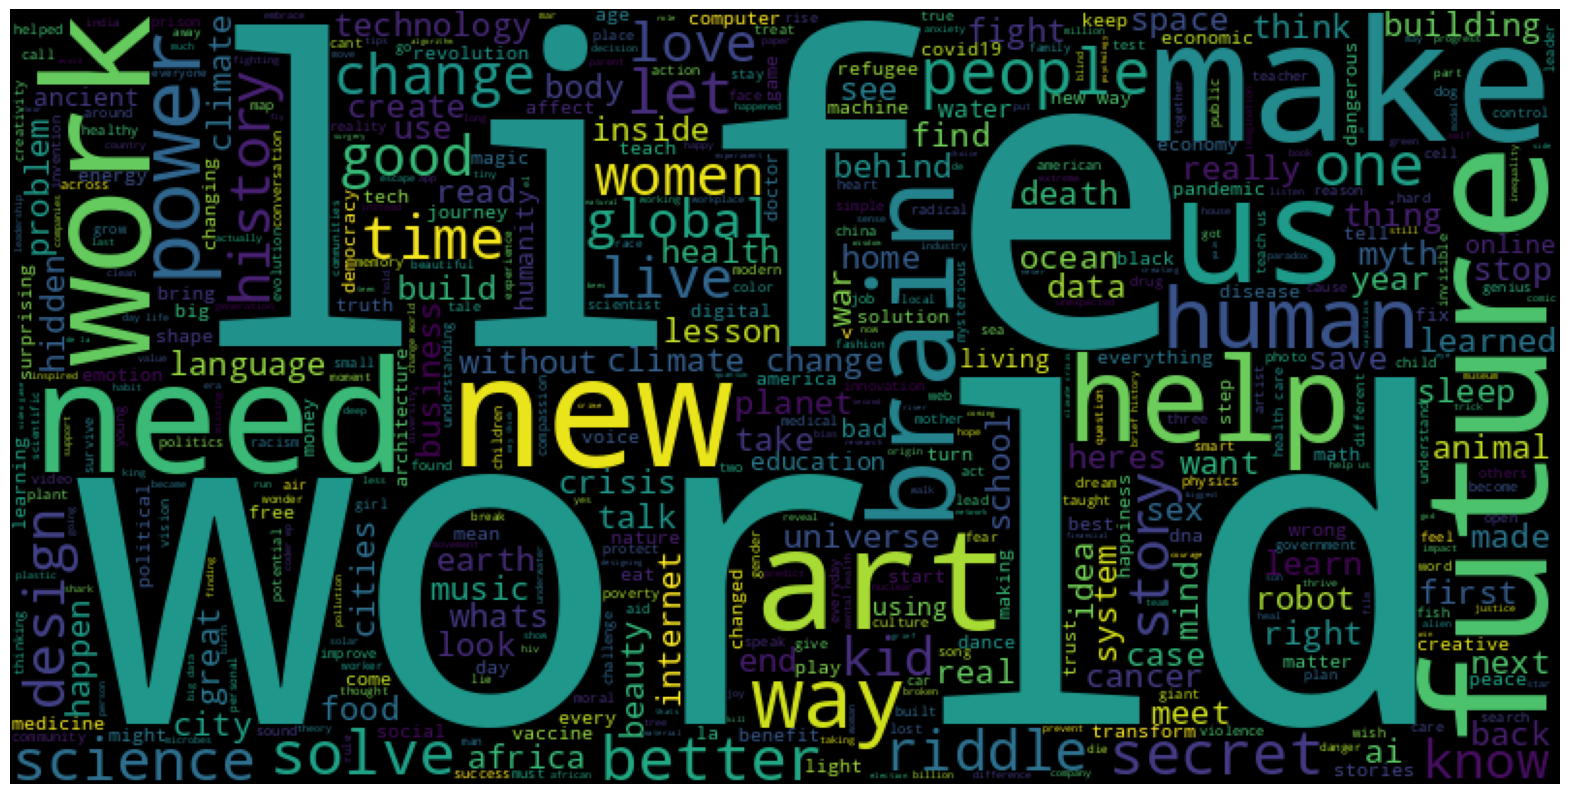

In [ ]:
title_corpus = " ".join(data['title'])

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000,
               width=800,
               height=400).generate(title_corpus)
plt.axis('off')
plt.imshow(wc)
plt.show()

# Recommender System

Finally, we can develop a recommendation system to suggest TED Talks based on an individual's interests. By analyzing user preferences, such as topics they engage with or keywords they search for, the system can recommend relevant TED Talks that align with their interests.

In [ ]:
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(data['title'])

In [ ]:
def get_similarities(talk_content, new_data = data):

  talk_content = [talk_content]
  talk_array1 = vectorizer.transform(talk_content).toarray()

  sim = []
  pea = []
  for idx, row in new_data.iterrows():
      title = row['title']

      talk_array2 = vectorizer.transform(
          [title]).toarray()

      min_len = min(talk_array1.shape[1], talk_array2.shape[1])
      pea_sim = pearsonr(talk_array1.squeeze()[:min_len], talk_array2.squeeze()[:min_len])[0]
      cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

      sim.append(cos_sim)
      pea.append(pea_sim)

  return sim, pea


In [ ]:
def recommend_talks(talk_content, data=data):

    data['cos_sim'], data['pea_sim'] = get_similarities(talk_content)

    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
                     False, False], inplace=True)

    display(data[['author', 'title']].head(20))


In [ ]:
talk_content = input("Enter the topic you are interested in: ")
recommend_talks(talk_content)

Enter the topic you are interested in: time management


author  \
999                   Fang Ruan   
4915          Stefan Sagmeister   
591         Andri Snær Magnason   
1713             Elizabeth Lyle   
2679                  Nagin Cox   
4967            Philip Zimbardo   
1826     Andrew Zimmerman Jones   
4757              Julia Sweeney   
1129          Alexander Leitner   
49    American Family Insurance   
4214      Michael Tilson Thomas   
2663            Brittney Cooper   
2710               Sharon Brous   
1754              Daniel Finkel   
1264                  Sarah Sze   
4791                Shukla Bose   
1032                Chieh Huang   
4457               Rory Stewart   
5233       Christopher deCharms   
5064          Natalie MacMaster   

                                                  title  
999      management lessons chinese business philosophy  
4915                                         power time  
591                                          time water  
1713  break bad management habits reach next generat...  
2679                                          time mars  
4967                                    psychology time  
1826                                         time exist  
4757                                      time the talk  
1129                                        time wasted  
49                                     one company time  
4214                                 music emotion time  
2663                               racial politics time  
2710                              time reclaim religion  
1754                           solve time travel riddle  
1264                         experience time memory art  
4791                            teaching one child time  
1032                           know time change careers  
4457                           time end war afghanistan  
5233                        look inside brain real time  
5064                                 fiddling reel time